# Tasca M4T02

## Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.

https://github.com/patriciaapenat/Data-Science-It-Academy/blob/63bf4116341a125e0185f384d3b1c74afa24ef6e/Sprint%204/Tasca%20M4T02ex1.ipynb

## Exercici 2

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

    Important: El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [4]:
#Càrreguem les llibreries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Ara les dades

path=r'https://raw.githubusercontent.com/patriciaapenat/Data-Science-It-Academy/main/Sprint%204/movies.dat'
data = pd.read_csv(path,
                       sep='::',
                       encoding = 'ISO-8859-1',
                       index_col = 0,
                       names = ['Index','Película','Género','Año'],
                       engine = 'python',
                      )
data = pd.DataFrame(data)
data.head(5)

,Película,Género,Año
Index,,,
1,Toy Story (1995),Animation|Children's|Comedy,NaN
2,Jumanji (1995),Adventure|Children's|Fantasy,NaN
3,Grumpier Old Men (1995),Comedy|Romance,NaN
4,Waiting to Exhale (1995),Comedy|Drama,NaN
5,Father of the Bride Part II (1995),Comedy,NaN


In [8]:
data.shape

(3883, 3)

    Primer fem una còpia del nostre dataset

In [9]:
df = data.copy(deep=True)

    També hem de corregir el any, hem de separar-ho de Película i crear una nova columna amb aquesta informació

In [10]:
df = data.copy(deep=True)
df['Año'] = df['Película'].str[-5:-1].astype(int)

    No més deixem el primer gènere

In [11]:
df['Género'] = df['Género'].str.split("|").str[0]

    i fem reindexació

In [178]:
df = df.reindex(columns=['Película','Año','Género'])

In [179]:
df.head(10)

,Película,Año,Género
Index,,,
1,Toy Story (1995),1995,Animation
2,Jumanji (1995),1995,Adventure
3,Grumpier Old Men (1995),1995,Comedy
4,Waiting to Exhale (1995),1995,Comedy
5,Father of the Bride Part II (1995),1995,Comedy
6,Heat (1995),1995,Action
7,Sabrina (1995),1995,Comedy
8,Tom and Huck (1995),1995,Adventure
9,Sudden Death (1995),1995,Action


    Des de fora tot sembla correcta, però anem a comprovar-ho

In [180]:
df.dtypes #Els tipus

Película    object
Año          int32
Género      object
dtype: object

In [181]:
df.columns #Noms de les columnes

Index(['Película', 'Año', 'Género'], dtype='object')

In [182]:
df.isnull().any() #Mirem si hi ha valors nuls

Película    False
Año         False
Género      False
dtype: bool

## Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

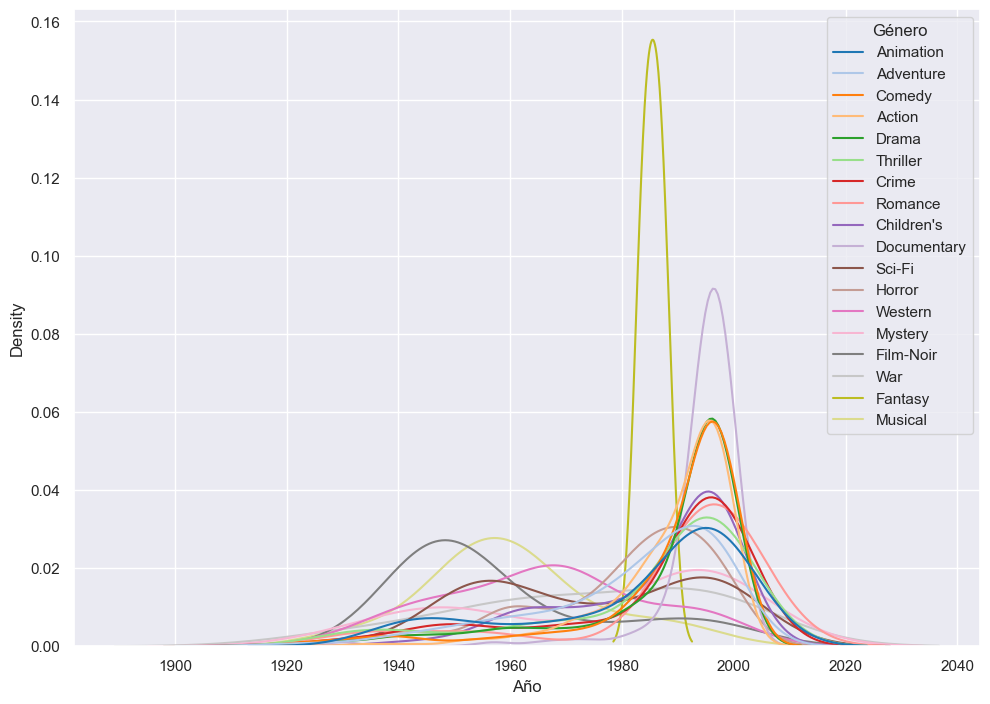

In [194]:
sns.kdeplot(x='Año', hue ='Género', data=df, common_norm = False, palette="tab20") #Degut a la gran quantitat de valors és important
sns.set(rc = {'figure.figsize' :(11.7,8.27)})

    Aquí podem veure un gràfic de línees on cada línea representa un génere, a l'eix X tenim l'any y al Y la densitat, es a dir, podem veure segons el any quin va ser el génere més produit però més important podem veure visualmente si proporcional, per exemple, veiem entre el 40-50 va haver més film-noir però tampoc es del tot comparable amb més endavant on hi han més películes en general. 
    Podem veure que la majoria de gèneres comencen a assolir el seu pic entre els 80 i la primera dècada dels 2000, és curiós que gèneres com fantasia pràcticament apareixen en aquest període fugaçment i passen de no tenir cap pel·lícula a la majoria ser d'aquest, amb fantasia i en aquesta època és improtant tenir en compte que parlem d'un rang molt ampli,  des de Conan el Bárbaro fins a Avatar aproximadament

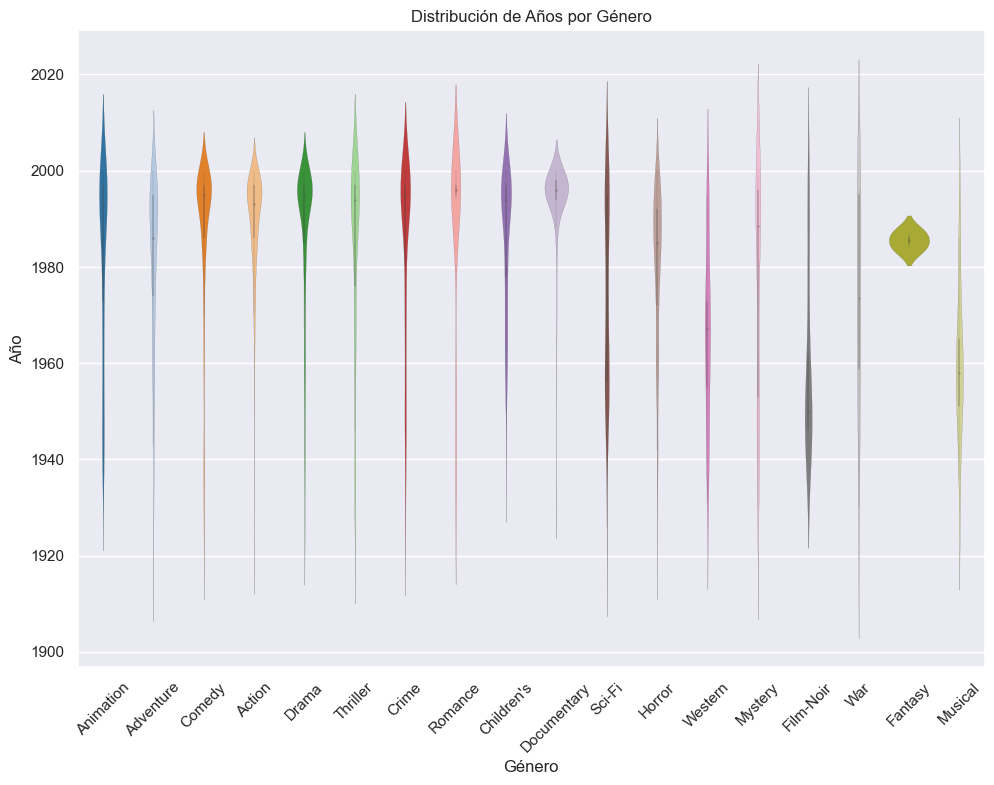

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11.7, 8.27))
sns.violinplot(x='Género', y='Año', data=df, palette='tab20', linewidth=0.1)


plt.xlabel('Género')
plt.ylabel('Año')
plt.title('Distribución de Años por Género')
plt.xticks(rotation=45)
plt.show()

    Aquest es un gràfic de violí, continua amb la mateixa idea, de fet son les mismes variables però aqui es pot veure amb més claredat els matissos de la distribució, l'analisi seria el mateix que el de la figura anterior perquè estem fent servir les mateixes variables, l'unic es que quan fem un gràfic de línies es fàcil perdre's si tenim massa opcions al hue, aqui es més clar on comença i acaba la presència del gènere al dataset tot i que no podem veure la evolució general amb tanta claredat